# Del 1: Pandas - Time Series

Pripravimo datasete:

In [2]:
!tar -xJf data/data_del_01.tar.xz -C ./data/

Viri:
- [Tutorial: Time Series Analysis with Pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Working with Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
- [Modern Pandas (Part 7): Timeseries](https://tomaugspurger.github.io/modern-7-timeseries)
- [Time series / date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

In [3]:
import numpy as np
import pandas as pd

## The data

<p>In this tutorial, we’ll be working with daily time series of <a href="https://open-power-system-data.org/">Open Power System Data (OPSD)</a> for Germany, which has been <a href="https://www.independent.co.uk/environment/renewable-energy-germany-six-months-year-solar-power-wind-farms-a8427356.html">rapidly expanding its renewable energy production in recent years</a>. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can download the data <a href="https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv">here</a>.</p>

<p>Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:</p>

<ul>
<li><code>Date</code> — The date (<em>yyyy-mm-dd</em> format)</li>
<li><code>Consumption</code> — Electricity consumption in GWh</li>
<li><code>Wind</code> — Wind power production in GWh</li>
<li><code>Solar</code> — Solar power production in GWh</li>
<li><code>Wind+Solar</code> — Sum of wind and solar power production in GWh</li>
</ul>

### Getting the data

Getting the data from: https://data.open-power-system-data.org/time_series/2018-06-30

In [ ]:
#poveže se na stran in prenese podatke, prereačuna in shrani v csv

In [ ]:
#Download hourly data from OPSD website
url = 'https://data.open-power-system-data.org/time_series/2018-06-30/'
datafile = url + 'time_series_60min_singleindex.csv'
df_all = pd.read_csv(datafile, index_col='utc_timestamp', parse_dates=True, low_memory=False)
df_all.head()

In [ ]:
df_all.info(memory_usage='deep')

In [ ]:
def extract_country(df_all, country_code, year_min=None, year_max=None):
    """Extract data for a single country"""
    
    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]
    
    # Extract columns and remove country codes from column labels
    columns_map = {col : col[3:] for col in columns}
    df_out = df_all[columns].rename(columns=columns_map)
    
    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]
        
    return df_out

In [ ]:
# Extract data for Germany, for complete years 2006-2017 
# (exclude incomplete years 2005 and 2018)
#definiraš državo in časovno obdobje, ki te zanima
df_hrly = extract_country(df_all, country_code='DE', year_min=2006, year_max=2017)

# Rename columns for convenience
cols_map = {'load_entsoe_power_statistics' : 'Consumption',
            'wind_generation_actual' : 'Wind',
            'solar_generation_actual' : 'Solar'}
df_hrly = df_hrly[list(cols_map.keys())].rename(columns=cols_map)

# Compute wind + solar generation
df_hrly['Wind+Solar'] = df_hrly[['Wind', 'Solar']].sum(axis=1, skipna=False)

# Convert from MW to GW
df_hrly = df_hrly / 1000
df_hrly.head()

In [ ]:
# Compute daily totals in GWh
df_daily = df_hrly.resample('D').sum(min_count=24)
df_daily = df_daily.rename_axis('Date')
df_daily.head()

In [ ]:
#izvozimo v csv
df_daily.to_csv('data/INPUT_opsd_germany_daily.csv')

## Time series data structures

In [4]:
#timestamp
time = '2019-01-15 3:15 pm' # to je string


In [5]:
#pretvorimo v timestamp objekt
pd.to_datetime(time)

Timestamp('2019-01-15 15:15:00')

In [6]:
pd.to_datetime('7/8/2019 14:55:00')

Timestamp('2019-07-08 14:55:00')

In [ ]:
#vedno zna pretvoriti v isti format (v timestamp)

In [7]:
pd.to_datetime('7/8/2019 14:55:00', dayfirst=True)

Timestamp('2019-08-07 14:55:00')

In [8]:
pd.to_datetime('7/8/2019 14:55:00', dayfirst=False)

Timestamp('2019-07-08 14:55:00')

In [ ]:
#DateTimeindex object

In [10]:
dates = ['2018-01-05', '7/8/1952', 'Oct 10, 1995']

In [11]:
#pretvorimo v datetimeIndex: kljub temu, da je bil vsak zapisan v dugačnem stringu pretvori vse v isti foramt
pd.to_datetime(dates)

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [ ]:
#tip podatka je datetime64[ns], to pomeni, da vsak datetime shrani v 64 bitni integer in tako pohitri program

<p>The following table, drawn from the <a href="http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html">NumPy datetime64 documentation</a>, lists the available format codes along with the relative and absolute timespans that they can encode:</p>

<table>
<thead><tr>
<th>Code</th>
<th>Meaning</th>
<th>Time span (relative)</th>
<th>Time span (absolute)</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Y</code></td>
<td>Year</td>
<td>± 9.2e18 years</td>
<td>[9.2e18 BC, 9.2e18 AD]</td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month</td>
<td>± 7.6e17 years</td>
<td>[7.6e17 BC, 7.6e17 AD]</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Week</td>
<td>± 1.7e17 years</td>
<td>[1.7e17 BC, 1.7e17 AD]</td>
</tr>
<tr>
<td><code>D</code></td>
<td>Day</td>
<td>± 2.5e16 years</td>
<td>[2.5e16 BC, 2.5e16 AD]</td>
</tr>
<tr>
<td><code>h</code></td>
<td>Hour</td>
<td>± 1.0e15 years</td>
<td>[1.0e15 BC, 1.0e15 AD]</td>
</tr>
<tr>
<td><code>m</code></td>
<td>Minute</td>
<td>± 1.7e13 years</td>
<td>[1.7e13 BC, 1.7e13 AD]</td>
</tr>
<tr>
<td><code>s</code></td>
<td>Second</td>
<td>± 2.9e12 years</td>
<td>[ 2.9e9 BC, 2.9e9 AD]</td>
</tr>
<tr>
<td><code>ms</code></td>
<td>Millisecond</td>
<td>± 2.9e9 years</td>
<td>[ 2.9e6 BC, 2.9e6 AD]</td>
</tr>
<tr>
<td><code>us</code></td>
<td>Microsecond</td>
<td>± 2.9e6 years</td>
<td>[290301 BC, 294241 AD]</td>
</tr>
<tr>
<td><code>ns</code></td>
<td>Nanosecond</td>
<td>± 292 years</td>
<td>[ 1678 AD, 2262 AD]</td>
</tr>
<tr>
<td><code>ps</code></td>
<td>Picosecond</td>
<td>± 106 days</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>fs</code></td>
<td>Femtosecond</td>
<td>± 2.6 hours</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>as</code></td>
<td>Attosecond</td>
<td>± 9.2 seconds</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
</tbody>
</table>

<p>For the types of data we see in the real world, a useful default is <code>datetime64[ns]</code>, as it can encode a useful range of modern dates with a suitably fine precision.</p>

In [12]:
dates = ['2/25/10', '8/6/17', '12/15/12']

In [13]:
pd.to_datetime(dates)

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [14]:
#pandas najprej zažene program, ki pogleda, kakšen je zapis in pretvori vsakega posebej, kar vzame precej časa
#če imamo vse stringe v enakem formatu, lahko uporabimo format, kar bo za velike datasete precej hitreje; pandas
#privzame, da so vsi podatki istega formata
pd.to_datetime(dates, format = '%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## Creating a time series DataFrame

In [15]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv')

In [16]:
opsd_daily.shape #dimenzija csvja

(4383, 5)

In [17]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [18]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Next, let’s check out the data types of each column.



In [19]:
#za vsak stolpec nam vrne kakšnega tipa je
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [20]:
#Date  bi moral biti tipa DateTime ne object, pretvorimo ga
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'], format = '%Y-%m-%d')

In [21]:
opsd_daily.dtypes
#vidimo, da je Date sedaj tipa DateTime64

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [22]:
#za indeks bi radi imeli čas - za index nastavimo stolpec Date
opsd_daily = opsd_daily.set_index('Date')

In [23]:
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [24]:
#pogledamo index df-ja
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

<p>Alternatively, we can consolidate the above steps into a single line, using the <code>index_col</code> and <code>parse_dates</code> parameters of the <code>read_csv()</code> function. This is often a useful shortcut.</p>

```python
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
```

In [25]:
#izberemo samo leto našega indeksa
opsd_daily.index.year 

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [26]:
#atributi časovnih podatkov
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

In [27]:
#5 naključnih vrstic izberemo
opsd_daily.sample(5, random_state= 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


## Time-based indexing

In [28]:
#izberemo vrstico za ta datum
opsd_daily.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [29]:
#izberemo obmoočje
opsd_daily.loc['2017-08-10' : '2017-08-17']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-08-10,1351.491,100.274,71.160,171.434,2017,8,Thursday
2017-08-11,1329.039,108.577,42.198,150.775,2017,8,Friday
2017-08-12,1121.458,305.908,80.906,386.814,2017,8,Saturday
2017-08-13,1025.070,101.266,141.157,242.423,2017,8,Sunday
2017-08-14,1305.341,136.416,201.027,337.443,2017,8,Monday
2017-08-15,1333.398,182.064,172.205,354.269,2017,8,Tuesday
2017-08-16,1364.029,68.592,150.677,219.269,2017,8,Wednesday
2017-08-17,1377.745,207.760,143.193,350.953,2017,8,Thursday


In [30]:
#partial string 
#izberemo samo februar 2017
opsd_daily.loc['2017-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-02-01,1627.965,221.296,23.817,245.113,2017,2,Wednesday
2017-02-02,1604.120,254.391,42.219,296.610,2017,2,Thursday
2017-02-03,1574.576,188.038,24.223,212.261,2017,2,Friday
2017-02-04,1344.391,211.453,49.257,260.710,2017,2,Saturday
2017-02-05,1238.879,118.332,46.216,164.548,2017,2,Sunday
2017-02-06,1574.502,152.119,28.576,180.695,2017,2,Monday
2017-02-07,1621.574,264.513,29.271,293.784,2017,2,Tuesday
2017-02-08,1625.415,219.683,30.996,250.679,2017,2,Wednesday
2017-02-09,1637.740,207.538,45.278,252.816,2017,2,Thursday


In [31]:
#izberemo celo leto 2017
opsd_daily.loc['2017'].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-01-01,1130.413,307.125,35.291,342.416,2017,1,Sunday
2017-01-02,1441.052,295.099,12.479,307.578,2017,1,Monday
2017-01-03,1529.990,666.173,9.351,675.524,2017,1,Tuesday
2017-01-04,1553.083,686.578,12.814,699.392,2017,1,Wednesday
2017-01-05,1547.238,261.758,20.797,282.555,2017,1,Thursday


## Visualizing time series data

In [32]:
# Display figures inline in Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Use seaborn style defaults and set the default figure size
#nastavimo velikost okvirja
sns.set(rc={'figure.figsize':(11, 4)})

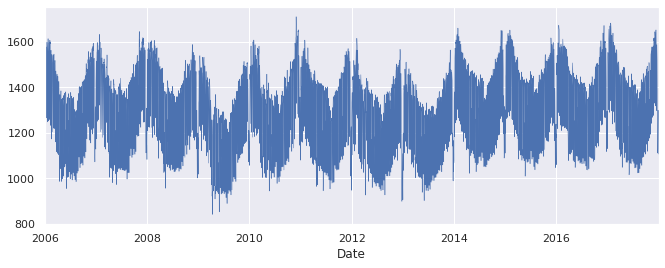

In [35]:
#prikažemo, kako se spreminja poraba elektrike za celotno obdobje
opsd_daily['Consumption'].plot(linewidth = 0.5)
plt.show()

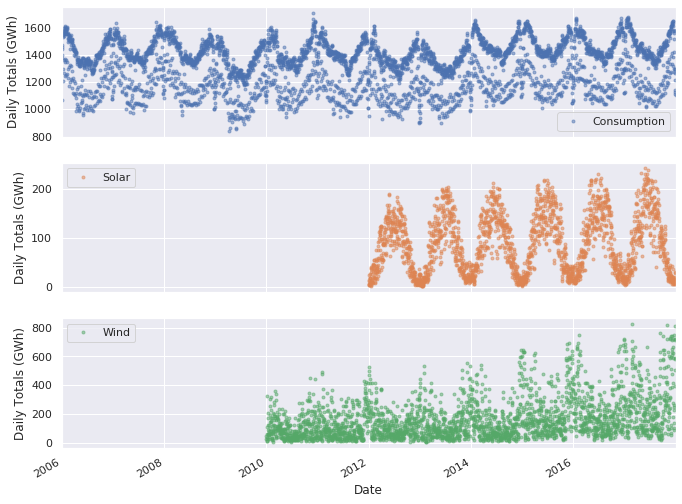

In [39]:
#namesto črt uporabimo pike 
#marker = '.' - da bodo pike
#subplots = True - hočemo za vsak stolpec svoj graf
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker = '.',
                                 alpha = 0.5,
                                 linestyle = 'None',
                                 figsize = (11,9),
                                  subplots = True)


#nastavimo ime za Y osi vsakemu grafu posebej
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

plt.show()


In [38]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49cfc05d68>,
      dtype=object)

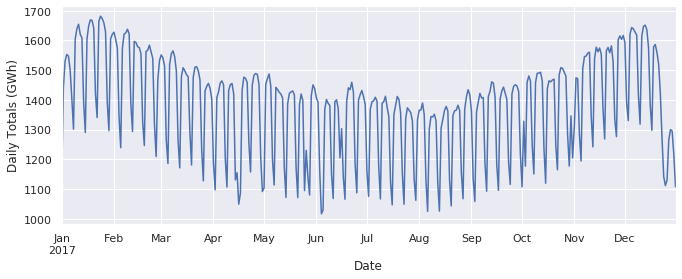

In [40]:
#narišemo Consumtion za 2017 (rabimo vrstice 2017 in stolpec consumption)
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Totals (GWh)')
plt.show()

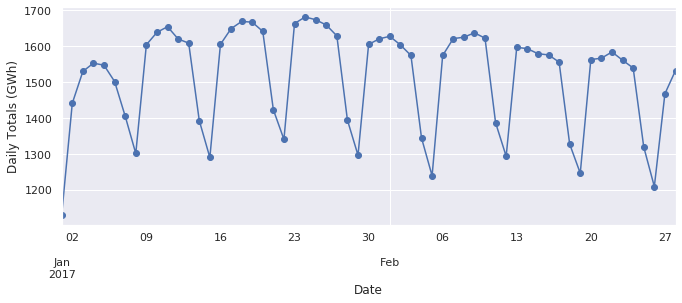

In [41]:
#narišemo mesec januar in februar
ax = opsd_daily.loc['2017-01': '2017-02', 'Consumption'].plot(marker = 'o', linestyle = '-')
ax.set_ylabel('Daily Totals (GWh)')
plt.show()



## Customizing time series plots

In [43]:
#navpične črte označujejo začeetek vsakega meseca 
#temu rečemo major_locator
#lahko jih urejamo


import matplotlib.dates as mdates

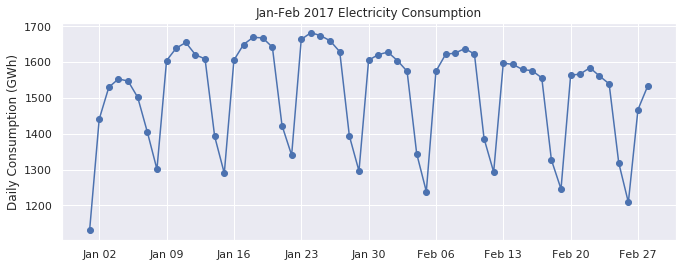

In [48]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()


## Seasonality

- [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
- [Trend, Seasonality, Moving Average, Auto Regressive Model : My Journey to Time Series Data with Interactive Code](https://towardsdatascience.com/trend-seasonality-moving-average-auto-regressive-model-my-journey-to-time-series-data-with-edc4c0c8284b)
- [Seasonality](https://en.wikipedia.org/wiki/Seasonality)

In [ ]:
#pogledali bomo podatke po sezonah
#uporabili bomo box plot: v škatli je 50%, na vsaki strani pa 25% vrednosti

<img src="images/1_NRlqiZGQdsIyAu0KzP7LaQ.png">

**Python zip**

In [49]:
#zip: združi elemente dveh enako dolgih listov po istoležnih elementih
numberList = [1, 2, 3]
strList = ['one', 'two', 'three']

list(zip(numberList, strList))

[(1, 'one'), (2, 'two'), (3, 'three')]

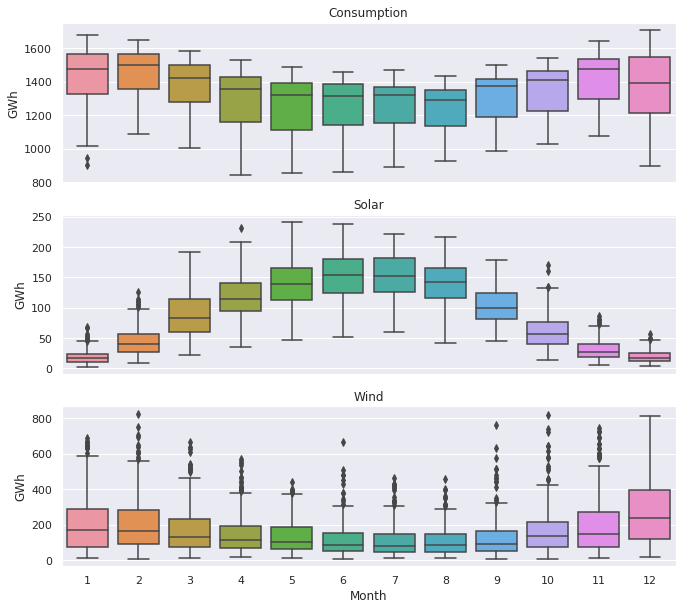

In [52]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    #naredimo box plot
    #določimo mu 3 parametre: data, x in y os; za x in y os nastavimo imena stolpcev
    sns.boxplot(data = opsd_daily, x ='Month', y= name , ax = ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]: #če graf ni zadnji, naj bo x label prazen (samo zadnji graf ima x os)
        ax.set_xlabel('')
plt.show()    

In [51]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49c57ed320>,
      dtype=object)

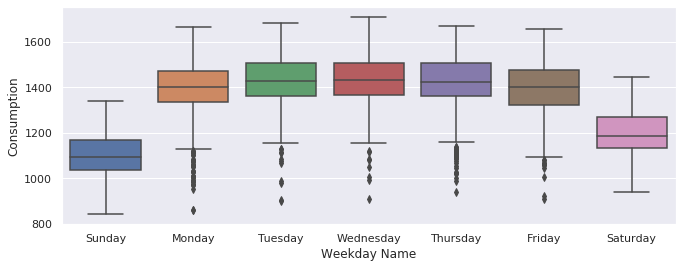

In [56]:
#združimo Consumption po dnevih v tednu 
sns.boxplot(data = opsd_daily, x ='Weekday Name', y= 'Consumption')
plt.show()

In [53]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


## Frequencies

In [ ]:
#podatke lahko prikažemo tudi s frekvencami
#do sedaj smo imeli dnevno frekvenco

In [57]:
#date_range: povemo mu od kdaj do kdaj in kakšno frekvenco naj uporabi
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [58]:
#3 dnvena frekvenca
pd.date_range('1998-03-10', '1998-03-15', freq='3D')

DatetimeIndex(['1998-03-10', '1998-03-13'], dtype='datetime64[ns]', freq='3D')

In [60]:
#povemo kolikokrat naj se ponovi (perioda) in s kakšno frekvenco
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [61]:
opsd_daily.index
#freq = None: ne zna privzet frekvence, to mu moramo posebej povedat

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
#spremenimo frekvenco iz None
#če mu kakšen interval manjka (npr. ni ene ure), lahko določimo, kako naj jo napolne

In [62]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [63]:
consum_freq = consum_sample.asfreq('D')

In [65]:
#vrednosti, ki mu manjkajo, privzeto  napolne z vrednostjo nan
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [67]:
#napolnimo manjkajoče vrednosti, določimo po kateri metodi
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method = 'ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## Resampling

In [69]:
#združiomo naše podatke po tednih in vzamemo povprečno vrednost za vsak teden
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [71]:
#frekvenca je weekly!
opsd_weekly_mean.index

DatetimeIndex(['2006-01-01', '2006-01-08', '2006-01-15', '2006-01-22',
               '2006-01-29', '2006-02-05', '2006-02-12', '2006-02-19',
               '2006-02-26', '2006-03-05',
               ...
               '2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19',
               '2017-11-26', '2017-12-03', '2017-12-10', '2017-12-17',
               '2017-12-24', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=627, freq='W-SUN')

In [72]:
opsd_weekly_mean.shape

(627, 4)

In [73]:
opsd_daily.shape

(4383, 7)

In [74]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

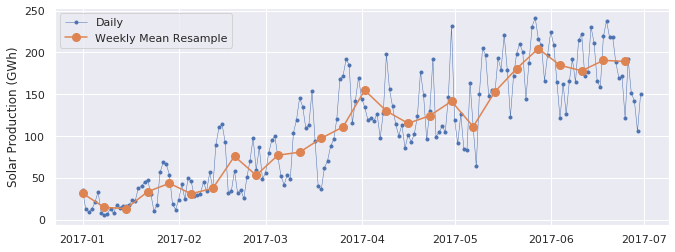

In [75]:
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
        marker='.', 
        linestyle='-', 
        linewidth=0.5, 
        label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], 
        marker='o', 
        markersize=8, 
        linestyle='-', 
        label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [77]:
#min_count: če je manj kot 28 vrednosti skupaj, na zapiši 0, ampak jih napolni z nan
#povemo koliko min vrednaoti mora biti, da vrne številko 
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count = 28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


In [78]:
#brez min_count zapiše 0, če nima podatkov
opsd_monthly1 = opsd_daily[data_columns].resample('M').sum()
opsd_monthly1.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,0.0,0.0,0.0
2006-02-28,41078.993,0.0,0.0,0.0
2006-03-31,43978.124,0.0,0.0,0.0


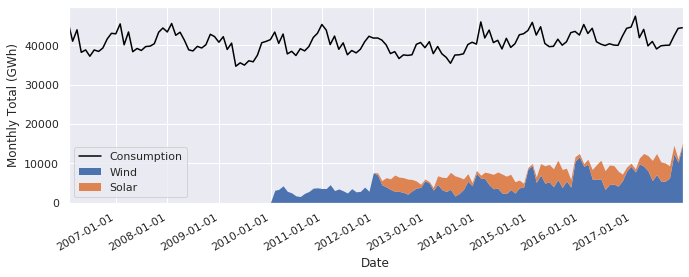

In [79]:
fig, ax = plt.subplots()

ax.plot(opsd_monthly['Consumption'], 
        color='black', 
        label='Consumption')

opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)')
plt.show()

In [80]:
#združimo vzorce po letih
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count = 360)

In [81]:
opsd_annual

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.53600,NaN,NaN,NaN
2007-12-31,496631.84700,NaN,NaN,NaN
2008-12-31,495570.87600,NaN,NaN,NaN
2009-12-31,459737.42800,NaN,NaN,NaN
2010-12-31,488588.70000,35911.777,NaN,NaN
2011-12-31,484814.08600,44032.951,NaN,NaN
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


In [82]:
#spremenimo index, da ne bo datum, ampak leto
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)

In [83]:
opsd_annual

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006,489068.53600,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999
2013,463336.85300,47197.832,29559.780,76697.443
2014,504164.82100,51107.672,32498.307,83370.502


In [84]:
#spremenimo ime indexa, ker to ni več date, ampak leto
opsd_annual.index.name = 'Year'

In [85]:
opsd_annual

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2006,489068.53600,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999
2013,463336.85300,47197.832,29559.780,76697.443
2014,504164.82100,51107.672,32498.307,83370.502


In [86]:
#kako se spreminjajo razmerja sončne + vetrne proizvodnje napram vsej pporabi čez leta
#kolikšen delež energije je proizveden iz sonca in vetra
opsd_annual['Wind+Solar/Consumption'] = (opsd_annual['Wind+Solar'] /opsd_annual['Consumption'])*100

In [87]:
opsd_annual

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2006,489068.53600,NaN,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999,15.705699
2013,463336.85300,47197.832,29559.780,76697.443,16.553279
2014,504164.82100,51107.672,32498.307,83370.502,16.536358


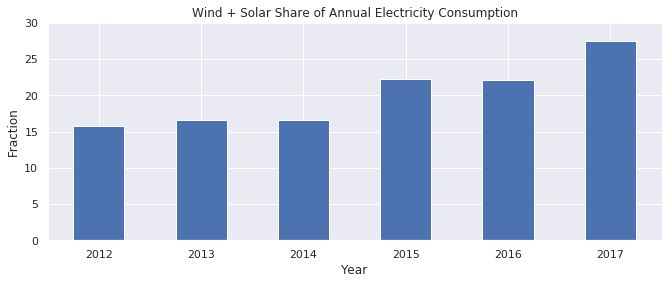

In [89]:
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 30)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()

#vidimo, da se res čedalje bolj povečuje pvetrna in sončna proizvodnja

## Rolling windows

<p><strong>Rolling window</strong> operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as <code>mean()</code>, <code>median()</code>, <code>sum()</code>, etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.</p>

<img src="images/rollingwindow.png">

In [ ]:
#

<ul>
<li><code>2006-01-01</code> to <code>2006-01-07</code> — labelled as <code>2006-01-04</code></li>
<li><code>2006-01-02</code> to <code>2006-01-08</code> — labelled as <code>2006-01-05</code></li>
<li><code>2006-01-03</code> to <code>2006-01-09</code> — labelled as <code>2006-01-06</code></li>
<li>and so on…</li>
</ul>

In [92]:
#določimo mu število vzorcev in
opsd_7d = opsd_daily[data_columns].rolling(7, center = True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


In [ ]:
#če ni dovolj vzorcev na levo in desno, vrne Nan
#zato so prvi 3 Nan, ker mora biti na vsako stran 3 vzorci, da izračuna

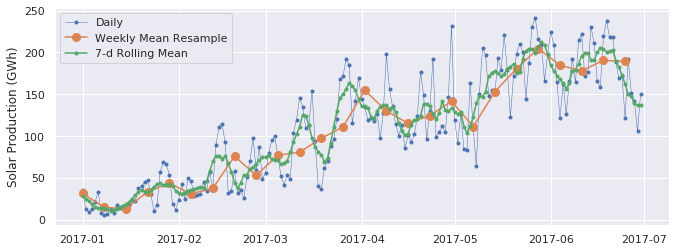

In [93]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'], 
        marker='.', 
        linestyle='-', 
        linewidth=0.5, 
        label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], 
        marker='o', 
        markersize=8, 
        linestyle='-', 
        label='Weekly Mean Resample')

ax.plot(opsd_7d.loc[start:end, 'Solar'], 
        marker='.', 
        linestyle='-', 
        label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [ ]:
#vidimo, da pri opsi_7d imamp enako število vzorcev, kot na začetku
#sledi dnevnemu vzorcu, le da špice malo bolj gladi

## Trends

In [94]:
#združimo na povprečno letno raven
opsd_365d = opsd_daily[data_columns].rolling(window=365, 
                                             center=True, 
                                             min_periods=360).mean()

In [98]:
opsd_365d.head(10)
#za prve pol leta so sami Nan, ker ni dovolj podatkov

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN
2006-01-07,NaN,NaN,NaN,NaN
2006-01-08,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN


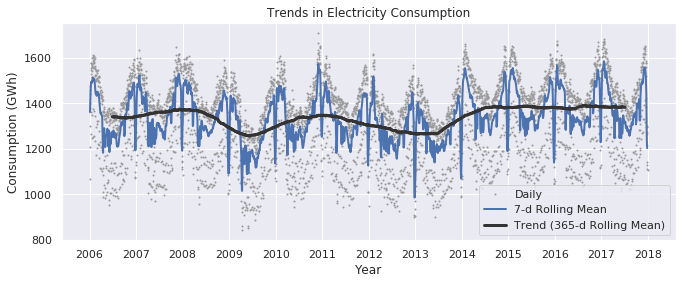

In [97]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'], 
        marker='.', 
        markersize=2, 
        color='0.6',
        linestyle='None', 
        label='Daily')

ax.plot(opsd_7d['Consumption'], 
        linewidth=2, 
        label='7-d Rolling Mean')

ax.plot(opsd_365d['Consumption'], 
        color='0.2', 
        linewidth=3,
        label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

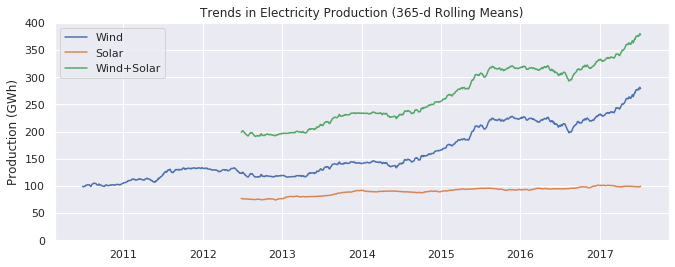

In [99]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()

for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label = nm)

# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()